- [x] k-Nearest Neighbours, 
- [x] Decision Trees, 
- [x] Random Forest, 
- [x] Bagging, 
- [x] AdaBoost, 
- [x] and SVM. 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.<br>
X2: Gender (1 = male; 2 = female).<br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).<br>
X4: Marital status (1 = married; 2 = single; 3 = others).<br>
X5: Age (year).<br>
X6 - X11: History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.<br>
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.<br>
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.<br>

In [164]:
import pandas as pd

In [165]:
df = pd.read_csv('creditdefault_train.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


0    11682
1     3318
Name: Y, dtype: int64


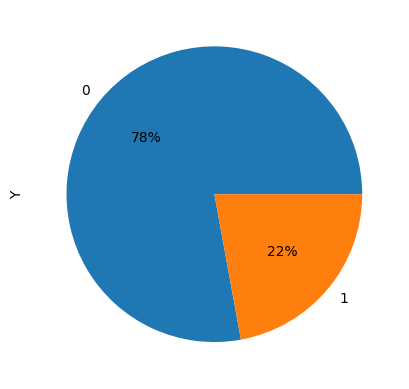

In [166]:
# distupution Y variable
print(df['Y'].value_counts())

# plot a pie chart
import matplotlib.pyplot as plt
df['Y'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [167]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.221200,167450.245333,1.604867,1.850000,1.556200,35.367933,-0.020467,-0.130933,-0.163000,-0.214467,...,47117.562067,43077.445667,40272.922667,38708.685867,5615.960000,5.822059e+03,4942.959000,4997.328867,4798.478400,5226.421267
std,0.415069,130109.925023,0.488896,0.786686,0.522743,9.154118,1.125048,1.198451,1.202606,1.180578,...,69182.434940,64016.907786,60503.339354,59212.425410,15551.708028,2.155675e+04,13629.034736,16499.349511,15463.948485,18099.851948
min,0.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-34041.000000,-170000.000000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2733.500000,2392.750000,1800.000000,1200.000000,1000.000000,8.330000e+02,390.000000,290.000000,204.000000,80.000000
50%,0.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,20165.000000,19090.500000,18178.000000,17177.000000,2113.000000,2.014000e+03,1809.000000,1500.000000,1500.000000,1500.000000
75%,0.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,60263.250000,54599.500000,50134.750000,49122.750000,5023.250000,5.000000e+03,4571.500000,4048.500000,4019.500000,4000.000000
max,1.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,855086.000000,706864.000000,587067.000000,568638.000000,493358.000000,1.227082e+06,380478.000000,528897.000000,426529.000000,528666.000000


In [168]:
# check for missing values
# df.isnull().sum()

In [169]:
df2 = pd.read_csv('creditdefault_test.csv')
df2.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66


In [170]:
# check for missing values
# df2.isnull().sum()

0    11682
1     3318
Name: Y, dtype: int64


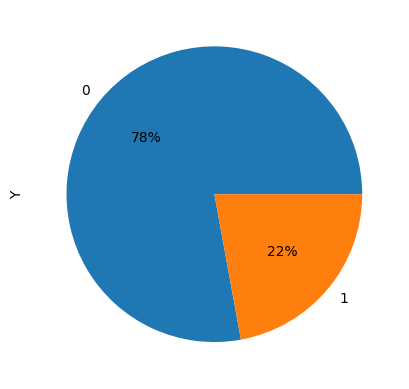

In [171]:
# distupution Y variable
print(df2['Y'].value_counts())

# plot a pie chart
import matplotlib.pyplot as plt
df2['Y'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [172]:
df2.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.221200,167518.40000,1.602600,1.856267,1.547533,35.603067,-0.012933,-0.136600,-0.169400,-0.226867,...,4.690875e+04,43448.452267,40349.879267,39034.834933,5711.201000,6.020268e+03,5508.404000,4654.824867,4800.296867,5204.583867
std,0.415069,129388.71212,0.489376,0.794008,0.521177,9.280067,1.122579,1.195953,1.191133,1.157593,...,6.951809e+04,64648.862167,61091.551799,59895.370421,17516.924518,2.443534e+04,20835.555914,14784.664100,15090.894847,17449.721214
min,0.000000,10000.00000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-50616.000000,-81334.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50000.00000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.639000e+03,2290.500000,1729.500000,1307.750000,980.750000,8.327500e+02,390.750000,300.000000,286.750000,156.750000
50%,0.000000,140000.00000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.004050e+04,19012.500000,18025.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1519.000000,1500.000000
75%,0.000000,240000.00000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.000650e+04,54407.000000,50247.250000,49327.000000,5001.000000,5.000000e+03,4500.000000,4001.500000,4041.250000,4007.000000
max,1.000000,1000000.00000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,527143.000000


In [173]:
# define X and y for training data and testing data (df and df2)
X_train = df.drop('Y', axis=1)
y_train = df['Y']

X_test = df2.drop('Y', axis=1)
y_test = df2['Y']

# print the shapes of X_train, y_train, X_test, y_test
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(15000, 23)
(15000,)
(15000, 23)
(15000,)


# Scale the Xtrain and Xtest

In [174]:
# Scale the training and testing data using 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [175]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

--------------------

# K-Nearest Neighbours

In [176]:
# import knn and gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [177]:
# knn model
knn = KNeighborsClassifier()

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [178]:
knn_grid_params = { 'algorithm': ['auto'],
                    'leaf_size': [30, 40, 50, 60, 70, 80, 90, 100],
                    'metric': ['euclidean', 'manhattan'],
                    'n_jobs': [-1],
                    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
                    'p': [1, 2],
                    'weights': ['uniform', 'distance'],
                    }

In [179]:
# fit the model
knn_grid = GridSearchCV(knn, 
                        knn_grid_params, 
                        cv=5, # 5-fold cross validation
                        verbose=1, 
                        n_jobs=-1
                        )

In [180]:
# fit the model
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'],
                         'leaf_size': [30, 40, 50, 60, 70, 80, 90, 100],
                         'metric': ['euclidean', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=1)

In [181]:
# print the best parameters
print(knn_grid.best_params_)
print(knn_grid.best_score_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}
0.8096


In [182]:
# create the model with the best parameters
knn_best = knn_grid.best_estimator_

In [183]:
# fit the model
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=23, p=1)

In [184]:
# predict the model
knn_y_pred = knn_best.predict(X_test)

In [185]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': knn_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])

In [186]:
x2

Predicted,0,1
True,,
0,11150,532
1,2295,1023


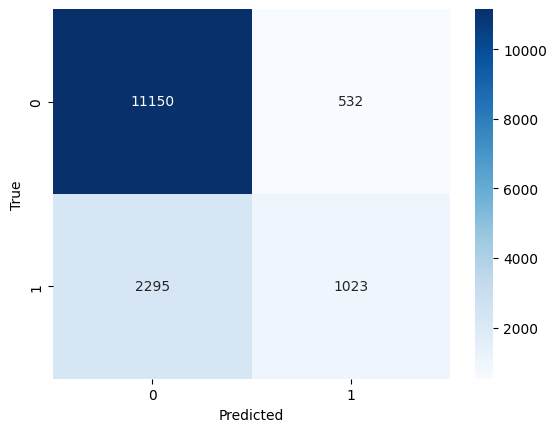

In [187]:
# create a heatmap for the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [188]:
import pandas as pd

def calculate_metrics(cm):
    TP = cm.iloc[0,0]
    TN = cm.iloc[1,1]
    FP = cm.iloc[1,0]
    FN = cm.iloc[0,1]

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    
    metrics_df = pd.DataFrame({
        "Metric": ["TP", "TN", "FP", "FN", "Precision", "Recall", "F1-Score", "Accuracy"],
        "Value": [TP, TN, FP, FN, precision, recall, f1_score, accuracy]
    })
    
    return metrics_df


In [189]:
knn_metrics = calculate_metrics(x2)
print(knn_metrics)

      Metric         Value
0         TP  11150.000000
1         TN   1023.000000
2         FP   2295.000000
3         FN    532.000000
4  Precision      0.829305
5     Recall      0.954460
6   F1-Score      0.887492
7   Accuracy      0.811533


----------------------

# Decision Tree

In [190]:
# import decision tree and gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [191]:
decisionTree = DecisionTreeClassifier()

decisionTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [192]:
decisionTree_grid_params = {'criterion': ['gini', 'entropy','log_loss'], 
                            'splitter': ['best', 'random'],
                            'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                            'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                            'max_features': ['auto', 'sqrt', 'log2'],
                            'random_state': [42,1 ,14],
                            }

In [193]:
# create the model
decisionTree_grid = GridSearchCV(decisionTree, 
                                decisionTree_grid_params,
                                cv=5, # 5-fold cross validation
                                verbose=1,
                                n_jobs=-1
                                )

In [194]:
# FIT the model
decisionTree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


c:\Users\admin\anaconda3\envs\ai\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [42, 1, 14],
                         'splitter': ['best', 'random']},
             verbose=1)

In [195]:
# print the best parameters
print(decisionTree_grid.best_params_)
print(decisionTree_grid.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.8175333333333332


In [196]:
# create the model with the best parameters
decisionTree_best = decisionTree_grid.best_estimator_

In [197]:
# fit the model
decisionTree_best.fit(X_train, y_train)

c:\Users\admin\anaconda3\envs\ai\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       random_state=42)

In [198]:
# predict the model
decisionTree_y_pred = decisionTree_best.predict(X_test)

In [199]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': decisionTree_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])

In [200]:
x2

Predicted,0,1
True,,
0,11099,583
1,2215,1103


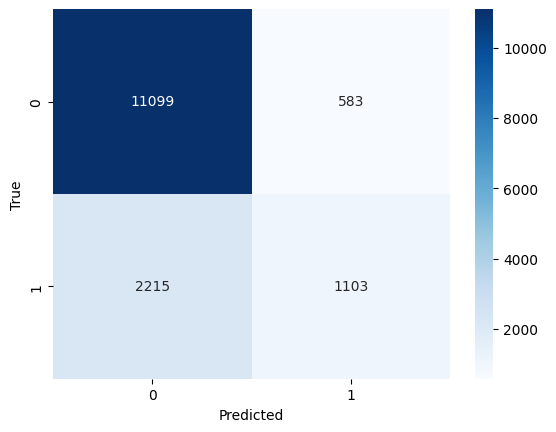

In [201]:
# create a heatmap for the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [202]:
decisionTree_metrics = calculate_metrics(x2)
print(decisionTree_metrics)

      Metric         Value
0         TP  11099.000000
1         TN   1103.000000
2         FP   2215.000000
3         FN    583.000000
4  Precision      0.833634
5     Recall      0.950094
6   F1-Score      0.888062
7   Accuracy      0.813467


------------

# Random forest

In [203]:
# import random forest and gridsearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [204]:
randomForest = RandomForestClassifier()

randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [206]:
randomForest_grid_params = {'criterion': ['gini', 'entropy','log_loss'],
                            'max_depth': [3, 4,5,10],
                            'min_samples_split': [3, 4,5,10],
                            'max_features': ['auto', 'sqrt', 'log2'],
                            'random_state': [42,1 ,14],
                            'n_estimators': [10, 50]
                            }

In [207]:
# fit the model
randomForest_grid = GridSearchCV(randomForest,
                                randomForest_grid_params,
                                cv=5, # 5-fold cross validation
                                verbose=1,
                                n_jobs=-1
                                )

In [208]:
# fit the model
randomForest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


c:\Users\admin\anaconda3\envs\ai\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 4, 5, 10],
                         'n_estimators': [10, 50],
                         'random_state': [42, 1, 14]},
             verbose=1)

In [209]:
# print the best parameters
print(randomForest_grid.best_params_)
print(randomForest_grid.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 50, 'random_state': 42}
0.8221999999999999


In [210]:
# create the model with the best parameters
randomForest_best = randomForest_grid.best_estimator_

In [211]:
# fit the model
randomForest_best.fit(X_train, y_train)

c:\Users\admin\anaconda3\envs\ai\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_split=4, n_estimators=50, random_state=42)

In [212]:
# make predictions
randomForest_y_pred = randomForest_best.predict(X_test)

In [213]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': randomForest_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])

In [214]:
x2

Predicted,0,1
True,,
0,11126,556
1,2158,1160


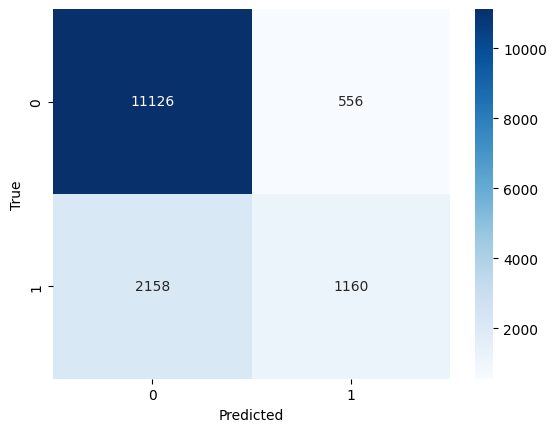

In [215]:
# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [216]:
randomForest_metrics = calculate_metrics(x2)

In [ ]:
print(randomForest_metrics)

----

# Bagging

In [217]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [218]:
bagging = BaggingClassifier()

bagging.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [219]:
bagging_grid_params = {'n_estimators': [10, 50],
                        'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                        'random_state': [42,1 ,14]
                        }

In [220]:
# fit the model
bagging_grid = GridSearchCV(bagging,    
                            bagging_grid_params,
                            cv=5, # 5-fold cross validation
                            verbose=1,
                            n_jobs=-1
                            )

In [221]:
# fit the model
bagging_grid.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50],
                         'random_state': [42, 1, 14]},
             verbose=1)

In [222]:
# print the best parameters
print(bagging_grid.best_params_)
print(bagging_grid.best_score_)

{'max_features': 6, 'max_samples': 9, 'n_estimators': 10, 'random_state': 14}
0.7868666666666666


In [223]:
# create the model with the best parameters
bagging_best = bagging_grid.best_estimator_

In [224]:
# fit the model
bagging_best.fit(X_train, y_train)

BaggingClassifier(max_features=6, max_samples=9, random_state=14)

In [225]:
# make predictions
bagging_y_pred = bagging_best.predict(X_test)

In [226]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': bagging_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])
x2

Predicted,0,1
True,,
0,11255,427
1,3055,263


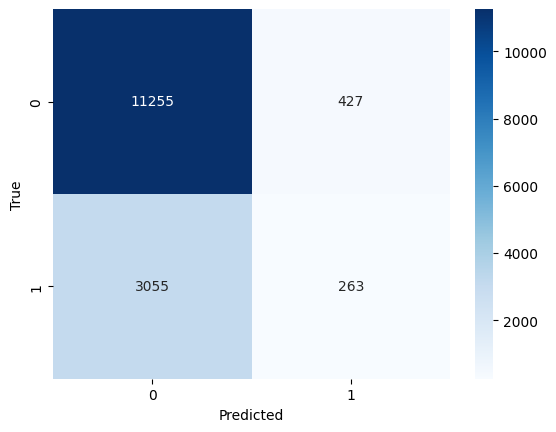

In [227]:
# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [228]:
bagging_metrics = calculate_metrics(x2)
print(bagging_metrics)

      Metric         Value
0         TP  11255.000000
1         TN    263.000000
2         FP   3055.000000
3         FN    427.000000
4  Precision      0.786513
5     Recall      0.963448
6   F1-Score      0.866036
7   Accuracy      0.767867


---

# AdaBoost

In [229]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [230]:
adaBoost = AdaBoostClassifier()

adaBoost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [231]:
adaBoost_grid_params = {'n_estimators': [10, 50, 100, 200, 300],
                        'learning_rate': [0.1, 0.001, 0.0001],
                        'random_state': [42,1 ,14]
                        }

In [232]:
# fit the model
adaBoost_grid = GridSearchCV(adaBoost,
                            adaBoost_grid_params,
                            cv=5, # 5-fold cross validation
                            verbose=1,
                            n_jobs=-1
                            )

In [233]:
# fit the model
adaBoost_grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.001, 0.0001],
                         'n_estimators': [10, 50, 100, 200, 300],
                         'random_state': [42, 1, 14]},
             verbose=1)

In [234]:
# print the best parameters
print(adaBoost_grid.best_params_)
print(adaBoost_grid.best_score_)

{'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 42}
0.8219333333333333


In [235]:
#  create the model with the best parameters
adaBoost_best = adaBoost_grid.best_estimator_

In [236]:
# fit the model
adaBoost_best.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=10, random_state=42)

In [237]:
# make predictions
adaBoost_y_pred = adaBoost_best.predict(X_test)

In [238]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': adaBoost_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])
x2

Predicted,0,1
True,,
0,11181,501
1,2240,1078


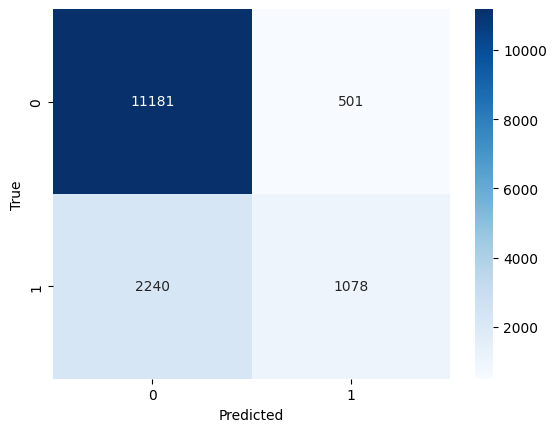

In [239]:
# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [240]:
adaBoost_metrics = calculate_metrics(x2)
print(adaBoost_metrics)

      Metric         Value
0         TP  11181.000000
1         TN   1078.000000
2         FP   2240.000000
3         FN    501.000000
4  Precision      0.833097
5     Recall      0.957114
6   F1-Score      0.890810
7   Accuracy      0.817267


-------

# SVM

In [242]:
# import svm from sklearn
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [243]:
svm = SVC()

svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [244]:
svm_grid_params = { 'C': [0.1, 1, 10],
                    'kernel': ['linear', 'rbf', 'poly'],
                    'degree': [2, 3, 4]
                    }

In [245]:
#  fit the model
svm_grid = GridSearchCV(svm,
                        svm_grid_params,
                        cv=5, # 5-fold cross validation
                        verbose=1,
                        n_jobs=-1
                        )

In [246]:
# fit the model
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [247]:
# print the best parameters
print(svm_grid.best_params_)
print(svm_grid.best_score_)

{'C': 1, 'degree': 2, 'kernel': 'rbf'}
0.8188000000000001


In [248]:
# create the model with the best parameters
svm_best = svm_grid.best_estimator_

In [249]:
# fit the model
svm_best.fit(X_train, y_train)

SVC(C=1, degree=2)

In [250]:
# make predictions
svm_y_pred = svm_best.predict(X_test)

In [251]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': svm_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])
x2

Predicted,0,1
True,,
0,11213,469
1,2243,1075


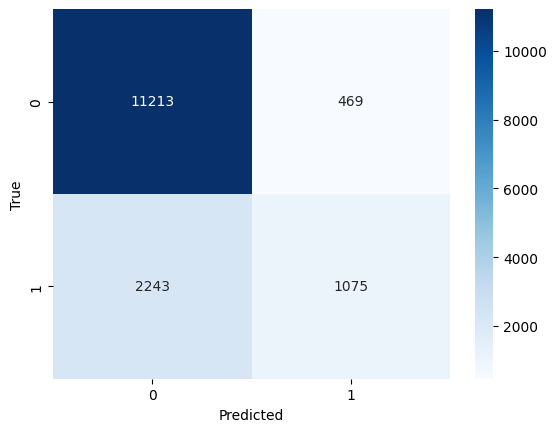

In [252]:
# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [253]:
svm_metrics = calculate_metrics(x2)
print(svm_metrics)

      Metric         Value
0         TP  11213.000000
1         TN   1075.000000
2         FP   2243.000000
3         FN    469.000000
4  Precision      0.833309
5     Recall      0.959853
6   F1-Score      0.892116
7   Accuracy      0.819200


----

# Summary